# Using mplfinance & ta

mplfinance is matplotlib utilities for the visualization, and visual analysis, of financial data.
It contains a new matplotlib finance API that makes it easier to create financial plots. 
It interfaces nicely with Pandas DataFrames.

The ta library is a Python package that provides a wide range of technical indicators for stock, forex, and cryptocurrency analysis. It is built on pandas and is useful for backtesting and algorithmic trading.

Ref. https://pypi.org/project/mplfinance/

In [ ]:
# %pip install --upgrade mplfinance   # Comment afetr installing

Setup

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import mplfinance as mpf
import yfinance as yf

In [2]:
aapl= yf.Ticker("aapl")   #  import yfinance as yf and create ourselves a ticker object for a particular ticker (stock)
aapl

yfinance.Ticker object <AAPL>

In [3]:
# get 1hour historical data for Apple between 02/06/2024 and 0720/06/2024 (British format)
#  
aapl_histo = aapl.history(start="2024-06-02", end="2024-06-20", interval="1h")
aapl_histo

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Datetime,,,,,,,
2024-06-03 09:30:00-04:00,192.979996,194.990005,192.529999,194.835007,14806084,0.0,0.0
2024-06-03 10:30:00-04:00,194.830002,194.919998,193.580002,194.130005,6469352,0.0,0.0
2024-06-03 11:30:00-04:00,194.119995,194.389999,193.240005,193.289398,4781872,0.0,0.0
2024-06-03 12:30:00-04:00,193.279999,193.826401,192.839996,193.789993,4233538,0.0,0.0
2024-06-03 13:30:00-04:00,193.759995,194.054993,193.089996,193.100006,3561086,0.0,0.0
...,...,...,...,...,...,...,...
2024-06-18 11:30:00-04:00,214.354996,214.440002,213.000000,213.220001,7665650,0.0,0.0
2024-06-18 12:30:00-04:00,213.220001,214.229996,213.216507,213.660004,7074821,0.0,0.0
2024-06-18 13:30:00-04:00,213.660004,214.055695,213.070007,213.723007,5483651,0.0,0.0


In [4]:
aapl_histo.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 84 entries, 2024-06-03 09:30:00-04:00 to 2024-06-18 15:30:00-04:00
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          84 non-null     float64
 1   High          84 non-null     float64
 2   Low           84 non-null     float64
 3   Close         84 non-null     float64
 4   Volume        84 non-null     int64  
 5   Dividends     84 non-null     float64
 6   Stock Splits  84 non-null     float64
dtypes: float64(6), int64(1)
memory usage: 5.2 KB


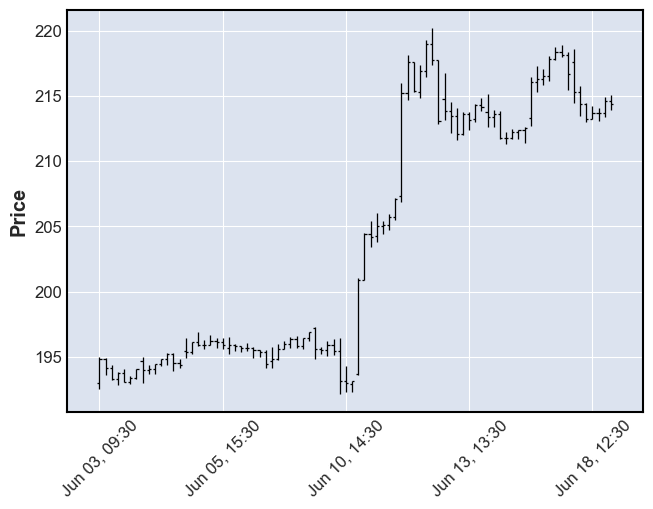

In [5]:
 mpf.plot(aapl_histo)

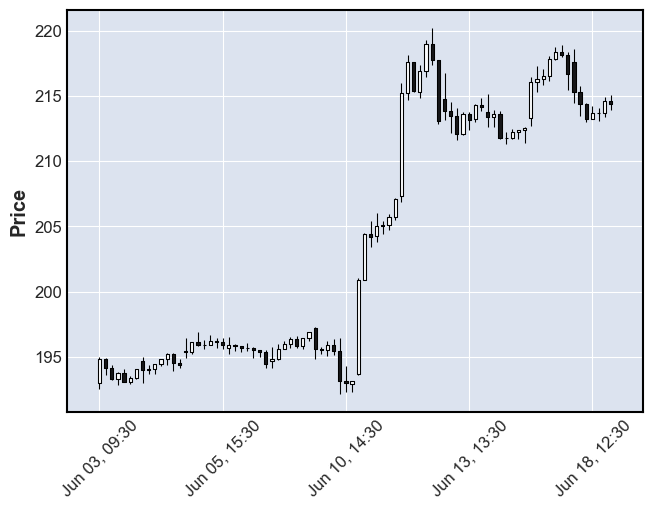

In [6]:
mpf.plot(aapl_histo,type='candle')

### Ploting moving averages 

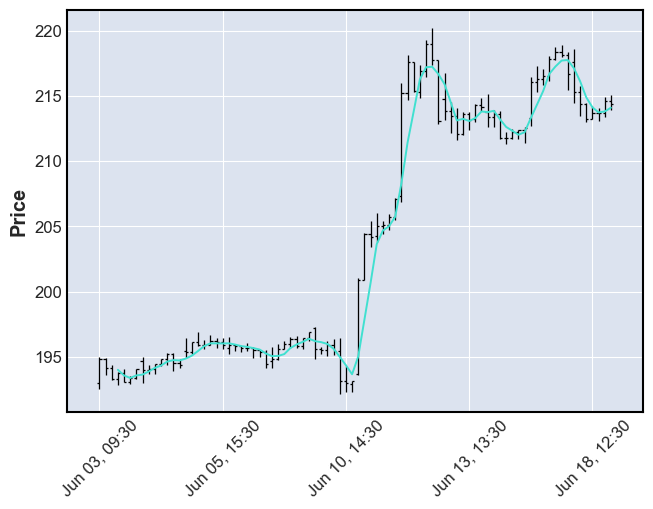

In [7]:


# use a scalar for a single moving average
# use a tuple or list of integers for multiple moving averages

mpf.plot(aapl_histo,type='ohlc',mav=4)

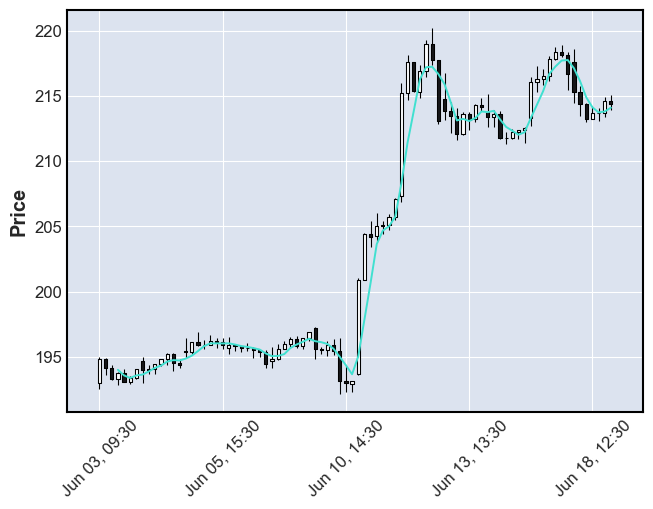

In [8]:
mpf.plot(aapl_histo,type='candle',mav=4)

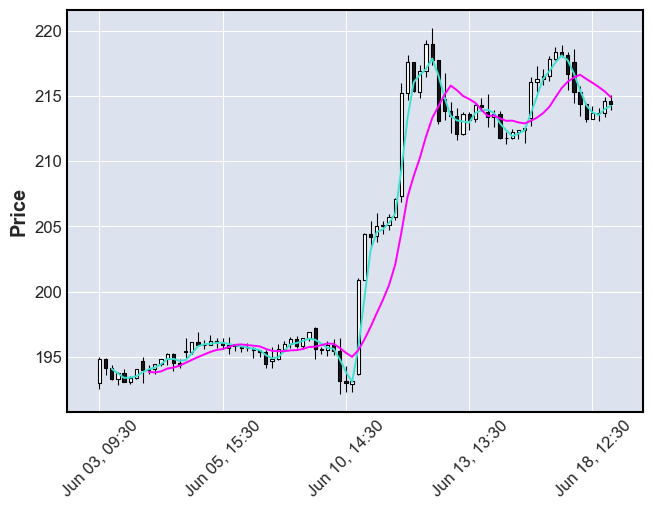

In [9]:
mpf.plot(aapl_histo,type='candle',mav=(3,9))

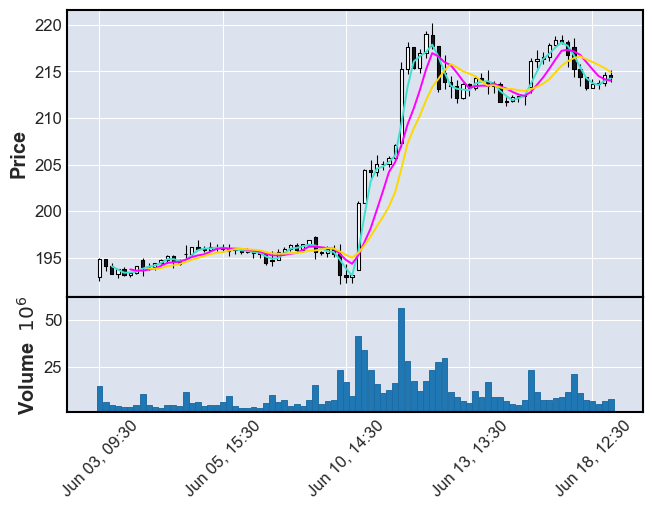

In [10]:
# We can also display Volume

mpf.plot(aapl_histo,type='candle',mav=(3,6,9),volume=True)

### Adding Indicators (RSI, MACD, Bollinger Bands) to Candlestick Charts

ta (Technical Analysis) provides indicators like RSI, MACD, and Bollinger Bands.


In [13]:
%pip install ta

  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Created wheel for ta: filename=ta-0.11.0-py3-none-any.whl size=29497 sha256=cd590757692a2d255e770900e9207d2009d549c3e7d2bf3c22ab24eeb8325e2d
  Stored in directory: c:\users\dell\appdata\local\pip\cache\wheels\e3\3a\ee\4955a26c90a4b7deb6d725dc8ec7b8604a7aef44e43a2e8af7
Successfully built ta
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [11]:
df = pd.DataFrame(aapl_histo)
df.index = pd.to_datetime(df.index)

In [16]:
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Datetime,,,,,,,
2024-06-03 09:30:00-04:00,192.979996,194.990005,192.529999,194.835007,14806084,0.0,0.0
2024-06-03 10:30:00-04:00,194.830002,194.919998,193.580002,194.130005,6469352,0.0,0.0
2024-06-03 11:30:00-04:00,194.119995,194.389999,193.240005,193.289398,4781872,0.0,0.0
2024-06-03 12:30:00-04:00,193.279999,193.826401,192.839996,193.789993,4233538,0.0,0.0
2024-06-03 13:30:00-04:00,193.759995,194.054993,193.089996,193.100006,3561086,0.0,0.0
...,...,...,...,...,...,...,...
2024-06-18 11:30:00-04:00,214.354996,214.440002,213.000000,213.220001,7665650,0.0,0.0
2024-06-18 12:30:00-04:00,213.220001,214.229996,213.216507,213.660004,7074821,0.0,0.0
2024-06-18 13:30:00-04:00,213.660004,214.055695,213.070007,213.723007,5483651,0.0,0.0


In [12]:
import ta

In [13]:
# Calculate Technical Indicators
df['SMA_20'] = ta.trend.sma_indicator(df['Close'], window=20)  # 20-day Simple Moving Average
df['BB_high'], df['BB_mid'], df['BB_low'] = ta.volatility.bollinger_hband(df['Close']), ta.volatility.bollinger_mavg(df['Close']), ta.volatility.bollinger_lband(df['Close'])
df['MACD'] = ta.trend.macd(df['Close'])
df['MACD_signal'] = ta.trend.macd_signal(df['Close'])
df['RSI'] = ta.momentum.rsi(df['Close'], window=14)

In [14]:
# Define Moving Averages & Bollinger Bands
apds = [
    mpf.make_addplot(df['SMA_20'], color='blue', label='20-Day SMA'),
    mpf.make_addplot(df['BB_high'], color='red', linestyle='dotted'),
    mpf.make_addplot(df['BB_low'], color='red', linestyle='dotted'),
]

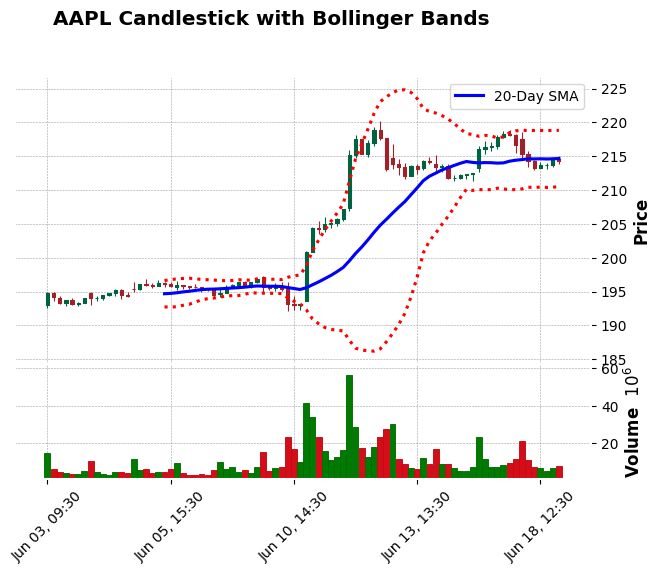

In [15]:
# Plot Candlestick Chart with Bollinger Bands
mpf.plot(df, type='candle', style='charles', addplot=apds, volume=True, title="AAPL Candlestick with Bollinger Bands")

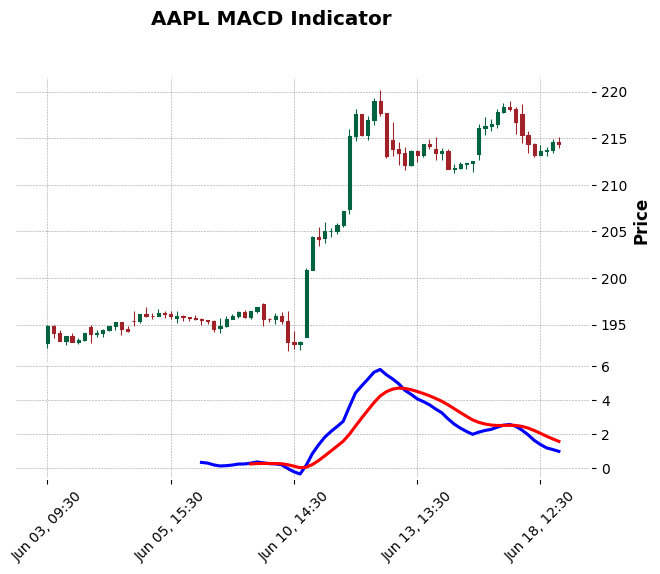

In [16]:
# Plot MACD Below Candlestick Chart
apds_macd = [
    mpf.make_addplot(df['MACD'], panel=1, color='blue', secondary_y=False),
    mpf.make_addplot(df['MACD_signal'], panel=1, color='red', secondary_y=False)
]

mpf.plot(df, type='candle', style='charles', addplot=apds_macd, volume=False, title="AAPL MACD Indicator")

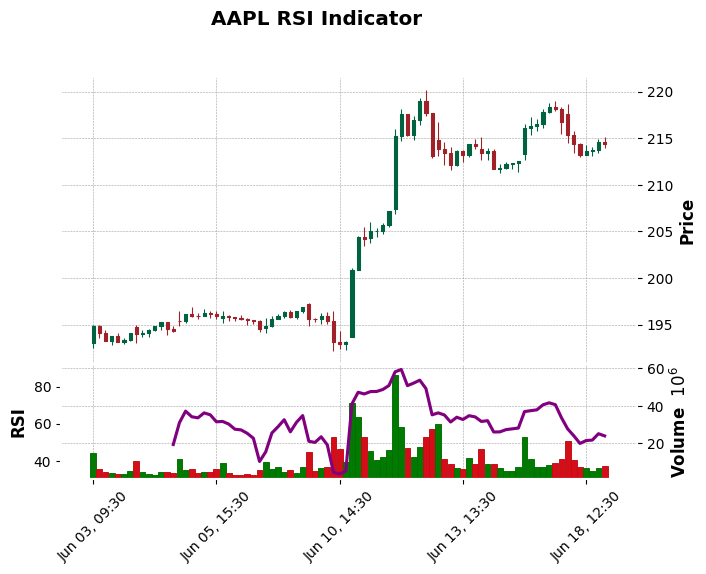

In [17]:
#  Plot RSI on a Separate Panel

apds_rsi = [
    mpf.make_addplot(df['RSI'], panel=1, color='purple', ylabel='RSI')
]

mpf.plot(df, type='candle', style='charles', addplot=apds_rsi, volume=True, title="AAPL RSI Indicator")